# Simple model for stock price

## Geometric Brownian Motion in Stock Price Modeling

Geometric Brownian Motion (GBM) is extensively used in financial modeling to simulate stock price movements. It is described by the stochastic differential equation $dS_t = \mu S_t dt + \sigma S_t dW_t$, where $S_t$ represents the stock price at time $t$, $\mu$ is the drift coefficient, $\sigma$ is the volatility coefficient, and $dW_t$ is the Brownian motion.

## Solving SDE for the gemetric brownian motion

The equation for the Geometric Brownian Motion (GBM) is given as a stochastic differential equation:

$$dS_t = \mu S_t dt + \sigma S_t dW_t$$

This equation can be interpreted as the infinitesimal change in the stock price $S_t$ being determined by a deterministic trend given by $\mu S_t dt$ and a stochastic component given by $\sigma S_t dW_t$.

To derive the solution to this stochastic differential equation, we can apply the Ito's Lemma which is used to find the differential of a function of a stochastic process.

Let's consider a function $f(t, S_t)$ where $f(t, S_t) = ln(S_t)$, applying Ito's lemma to this function gives:

$$df = \frac{\partial f}{\partial t} dt + \frac{\partial f}{\partial S} dS + \frac{1}{2} \frac{\partial^2 f}{\partial S^2} (dS)^2$$

Let's apply Ito's lemma to the function $f(t, S_t) = ln(S_t)$.

The partial derivatives needed for Ito's lemma in this case are:

$$\frac{\partial f}{\partial t} = 0$$

$$\frac{\partial f}{\partial S} = \frac{1}{S}$$

$$\frac{\partial^2 f}{\partial S^2} = -\frac{1}{S^2}$$

Substituting these into Ito's lemma gives:

$$df = 0 \cdot dt + \frac{1}{S} \cdot dS - \frac{1}{2} \cdot \frac{1}{S^2} \cdot (dS)^2$$

We know that $dS_t = \mu S_t dt + \sigma S_t dW_t$, so we can substitute this in for $dS$ and $(dS)^2$:

$$df = \frac{1}{S} \cdot (\mu S dt + \sigma S dW_t) - \frac{1}{2} \cdot \frac{1}{S^2} \cdot (\mu^2 S^2 (dt)^2 + 2 \mu \sigma S^2 dt dW_t + \sigma^2 S^2 (dW_t)^2)$$

In stochastic calculus, $(dt)^2 = 0$ and $dt dW_t = 0$. Also, $(dW_t)^2 = dt$. Therefore, our equation simplifies to:

$$df = \mu dt + \sigma dW_t - \frac{1}{2} \sigma^2 dt$$

Rearranging terms, we get:

$$df = \left(\mu - \frac{1}{2} \sigma^2\right) dt + \sigma dW_t$$

$$df = \left(\mu - \frac{1}{2} \sigma^2\right) dt + \sigma dW_t$$

Integrating both sides from 0 to t gives:

$$f_t - f_0 = \left(\mu - \frac{1}{2} \sigma^2\right)t + \sigma W_t$$

Substituting $f_t = ln(S_t)$ and $f_0 = ln(S_0)$ we get:

$$ln(S_t) - ln(S_0) = \left(\mu - \frac{1}{2} \sigma^2\right)t + \sigma W_t$$

Finally, by exponentiating both sides and rearranging terms, we get:

$$S_t = S_0 e^{(\mu - \frac{1}{2} \sigma^2)t + \sigma W_t}$$

This is the required solution to the GBM stochastic differential equation, representing the stock price dynamics under the assumption of GBM.

## Stock price simulation

This formulation ensures stock prices are non-negative, as they are modeled as the exponent of a Brownian motion: $$S_t = S_0 e^{(\mu - \frac{1}{2} \sigma^2)t + \sigma W_t},$$ with $S_0$ being the initial stock price.

## Let's look at the trajectories

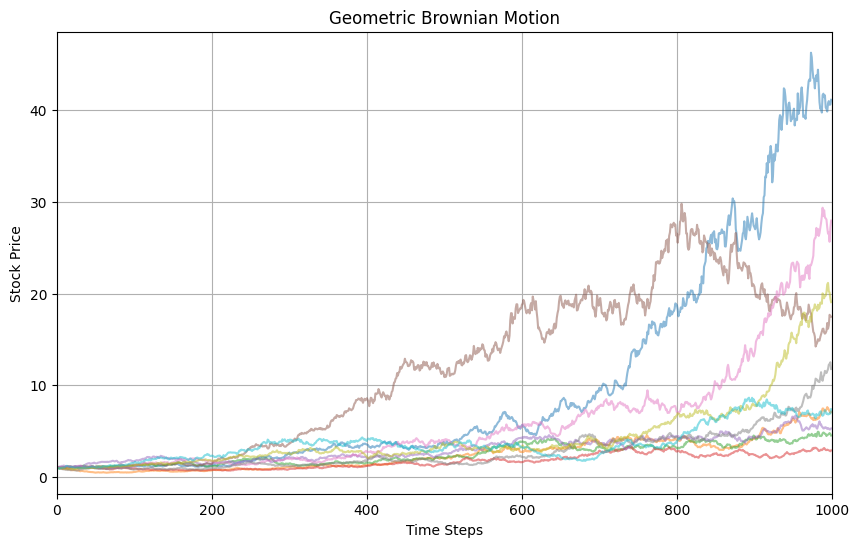

In [136]:
import numpy as np
import matplotlib.pyplot as plt

def geometric_brownian_motion(T, mu, sigma, S0, steps):
    """
    Simulate a Geometric Brownian Motion trajectory.

    Parameters:
    T (float): Total time.
    mu (float): Drift coefficient.
    sigma (float): Volatility coefficient.
    S0 (float): Initial stock price.
    steps (int): Number of steps.

    Returns:
    numpy.ndarray: Simulated GBM path.
    """
    dt = T/steps
    t = np.linspace(0, T, steps)
    W = np.random.standard_normal(size = steps)
    W = np.cumsum(W)*np.sqrt(dt) # standard brownian motion
    X = (mu - 0.5 * sigma**2) * t + sigma * W
    S = S0 * np.exp(X) # geometric brownian motion
    return S

# Simulation parameters
T = 1.0 # time horizon
mu = 2.3 # drift
sigma = 0.9 # volatility
S0 = 1 # initial stock price
steps = 1000 # number of steps

# Simulate GBM

# Plotting
plt.figure(figsize=(10, 6))
for i in range(10):
    gbm = geometric_brownian_motion(T, mu, sigma, S0, steps)
    plt.plot(gbm, alpha=0.5)
plt.title("Geometric Brownian Motion")
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.xlim(0,steps)
#plt.ylim(60,180)
plt.grid()
plt.show()

## Real stock prices

In [33]:
#!pip install yfinance

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


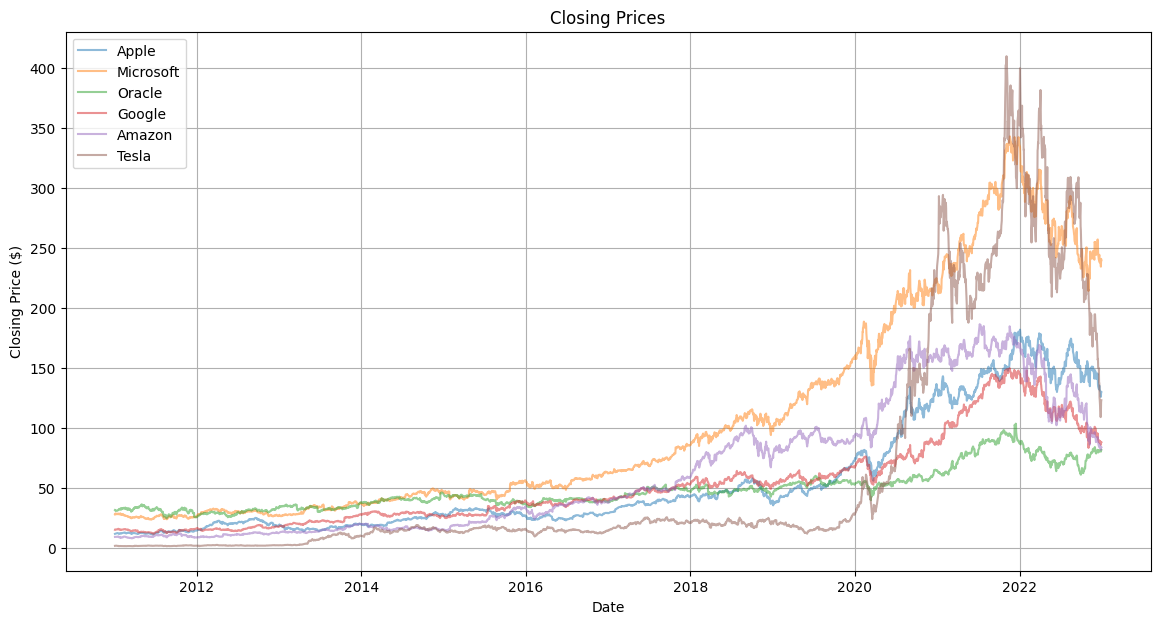

In [63]:
import yfinance as yf  
import matplotlib.pyplot as plt  
  
# Download historical data as pandas DataFrame  
apple_data = yf.download('AAPL', start='2011-01-01', end='2022-12-31')  
microsoft_data = yf.download('MSFT', start='2011-01-01', end='2022-12-31')  
oracle_data = yf.download('ORCL', start='2011-01-01', end='2022-12-31')  
google_data = yf.download('GOOGL', start='2011-01-01', end='2022-12-31')  
amazon_data = yf.download('AMZN', start='2011-01-01', end='2022-12-31')  
tesla_data = yf.download('TSLA', start='2011-01-01', end='2022-12-31')  

# Plot closing prices  
plt.figure(figsize=(14, 7))  
plt.plot(apple_data['Close'], label='Apple', alpha=0.5)  
plt.plot(microsoft_data['Close'], label='Microsoft', alpha=0.5)  
plt.plot(oracle_data['Close'], label='Oracle',alpha=0.5 )  
plt.plot(google_data['Close'], label='Google', alpha=0.5)  
plt.plot(amazon_data['Close'], label='Amazon', alpha=0.5)  
plt.plot(tesla_data['Close'], label='Tesla', alpha=0.5)  
plt.title('Closing Prices')  
plt.xlabel('Date')  
plt.ylabel('Closing Price ($)')  
plt.legend()  
plt.grid(True)  
plt.show()  


### European Call Option

A European call option grants the holder the right, without the obligation, to purchase an underlying asset at a predetermined strike price, denoted as $K$, on a specific expiration date. The life span of the option is characterized by the time to maturity, represented as $T$. The payout function (or the holder profit) of the option at the final time $T$ is given by: $$ \max(S_T - K, 0) $$ where $S_T$ is the price of the underlying asset at maturity. This function highlights that the option holder profits only when the asset's price exceeds the strike price at maturity.


## Now assume the zero drift geometric brownian motion

100%|██████████| 50000/50000 [00:03<00:00, 15574.66it/s]


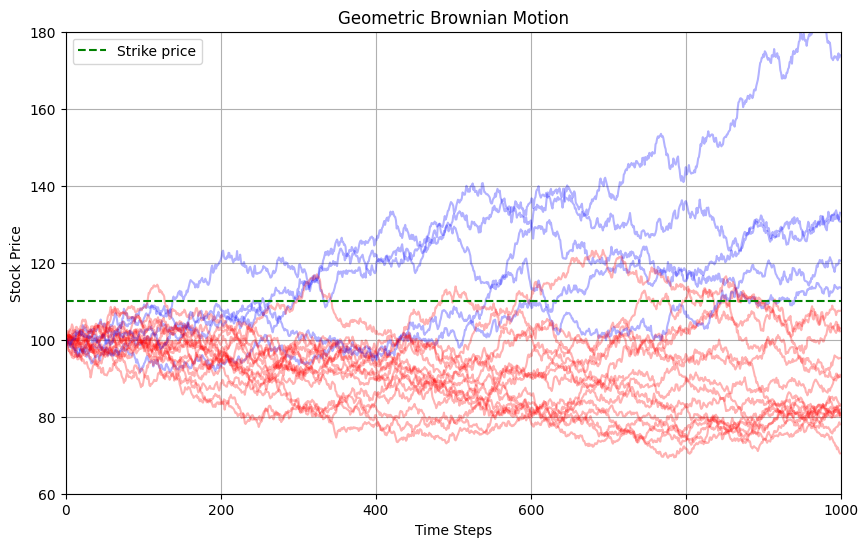

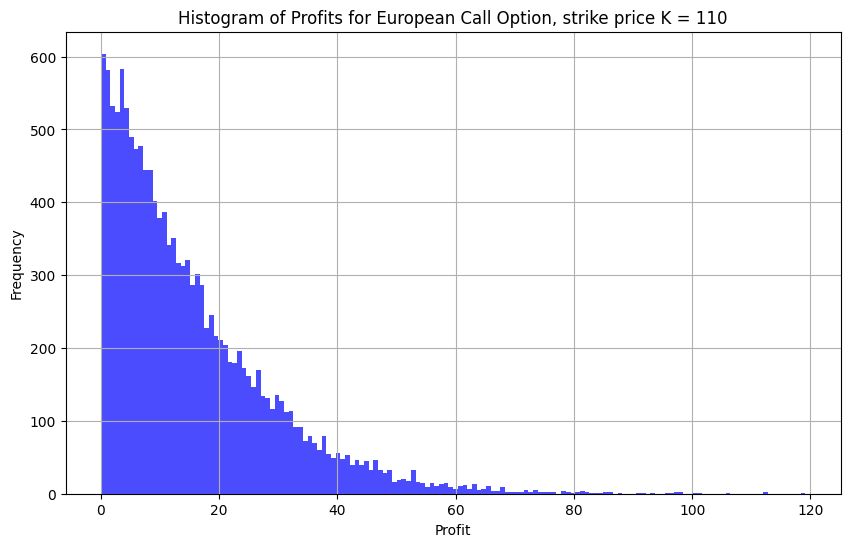

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def geometric_brownian_motion(T, mu, sigma, S0, steps):
    """
    Simulate a Geometric Brownian Motion trajectory.
    """
    dt = T/steps
    t = np.linspace(0, T, steps)
    W = np.random.standard_normal(size = steps)
    W = np.cumsum(W)*np.sqrt(dt) # standard brownian motion
    X = (mu - 0.5 * sigma**2) * t + sigma * W
    S = S0 * np.exp(X) # geometric brownian motion
    return S

# Simulation parameters
T = 1.0 # time horizon
mu = 0.0 # drift
sigma = 0.2 # volatility
S0 = 100 # initial stock price
K = 110 # strike price
steps = 1000 # number of steps
simulations = 50000 # number of simulations

# Simulate GBM and calculate profits
profits = []
for i in tqdm(range(simulations)):
    gbm = geometric_brownian_motion(T, mu, sigma, S0, steps)
    profit = max(gbm[-1] - K, 0) # profit at maturity
    if profit != 0:
        profits.append(profit)

# Plotting
plt.figure(figsize=(10, 6))
for i in range(20):
    gbm = geometric_brownian_motion(T, mu, sigma, S0, steps)
    color = 'blue' if gbm[-1] > K else 'red'
    plt.plot(gbm, alpha=0.3, color=color)
plt.axhline(K, color='green', linestyle='--', label='Strike price')
plt.title("Geometric Brownian Motion")
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.xlim(0, steps)
plt.ylim(60, 180)
plt.grid()
plt.legend()
plt.show()

# Plotting the histogram of profits
plt.figure(figsize=(10, 6))
plt.hist(profits, bins=150, alpha=0.7, color='blue')
plt.title(f"Histogram of Profits for European Call Option, strike price K = {K}")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.grid()
plt.show()


100%|██████████| 100/100 [00:04<00:00, 22.27it/s]


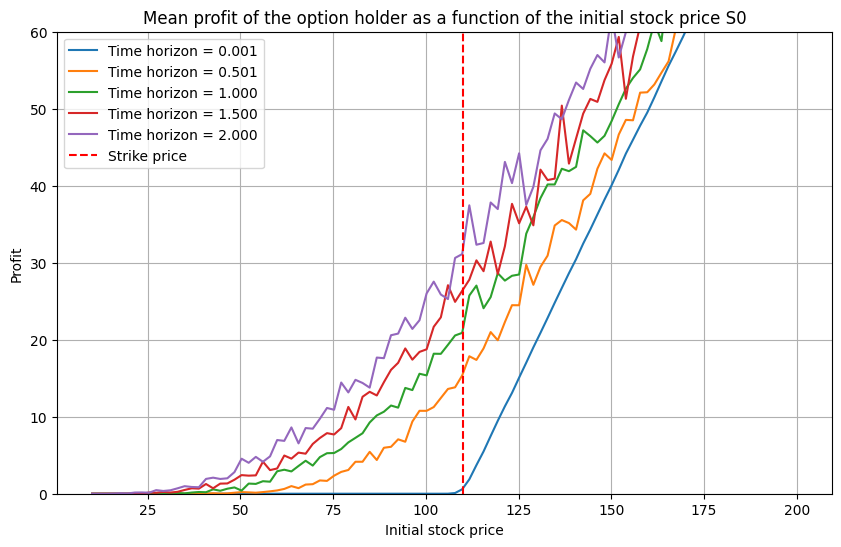

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def geometric_brownian_motion(T, mu, sigma, S0, steps):
    """
    Simulate a Geometric Brownian Motion trajectory.
    """
    dt = T / steps
    t = np.linspace(0, T, steps)
    W = np.random.standard_normal(size=steps)
    W = np.cumsum(W) * np.sqrt(dt)  # standard brownian motion
    X = (mu - 0.5 * sigma ** 2) * t + sigma * W
    S = S0 * np.exp(X)  # geometric brownian motion
    return S

# Simulation parameters
T_max = 2.0  # time horizon
mu = 0.0  # drift
sigma = 0.5  # volatility
K = 110  # strike price
steps = 500  # number of steps
simulations = 1000  # number of simulations

plt.figure(figsize=(10, 6))
for T in np.linspace(0.001, T_max, 5):
    mean_profit = []
    for S0 in tqdm(np.linspace(10, 200, 100)):
        # Simulate GBM and calculate profits
        profits = []
        for i in range(simulations):
            gbm = geometric_brownian_motion(T, mu, sigma, S0, steps)
            profit = max(gbm[-1] - K, 0)  # profit at maturity
            profits.append(profit)
        mean_profit.append(np.mean(profits))

    plt.plot(np.linspace(10, 200, 100), mean_profit, label=f'Time horizon = {T:.3f}')

plt.title("Mean profit of the option holder as a function of the initial stock price S0")
plt.axvline(K, color='red', linestyle='--', label='Strike price')
plt.ylim(0, 60)
plt.legend()
plt.xlabel("Initial stock price")
plt.ylabel("Profit")
plt.grid()
plt.show()


The profit of a European call option as an average over the density of the stock price at maturity can be expressed as:

$$ \text{Option Profit}(K, S_0, T) = \int_{-\infty}^{\infty} \max(S_T - K, 0) \cdot p(S_T, t=T|S_0, t=0) \, dS_T $$

where:

- $S_T$ is the stock price at maturity,
- $S_0$ is the initial stock price,
- $K$ is the strike price of the option,
- $p(S_T, t=T|S_0, t=0)$ is the transition probability density function.


The Fokker-Planck equation for a general Itô process described by the stochastic differential equation 
$$
dX_t = \mu(X_t, t) dt + \sigma(X_t, t) dW_t 
$$
is given by:
$$ \frac{\partial p(x, t)}{\partial t} = -\frac{\partial}{\partial x} \left[ \mu(x, t) p(x, t) \right] + \frac{1}{2} \frac{\partial^2}{\partial x^2} \left[ \sigma^2(x, t) p(x, t) \right] $$

where:

- \( $p(x, t)$ \) is the probability density function of the process \( X_t \) at time \( t \),
- \( $\mu(x, t)$ \) is the drift coefficient of the process,
- \( $\sigma(x, t)$ \) is the diffusion coefficient (volatility) of the process,
- \( $X_t$ \) is the state of the process at time \( t \),
- \( $W_t$ \) is a Wiener process (standard Brownian motion).



Then the Fokker-Planck equation for the transition probability density function of a stock price obeying the geometric brownian motion
$$
dS_t = \mu S_t dt + \sigma S_t dW_t
$$

can be expressed as:

$$ \frac{\partial p(S, t|S_0, 0)}{\partial t} = -\frac{\partial}{\partial S} \left[ \mu S p(S, t|S_0, 0) \right] + \frac{1}{2} \frac{\partial^2}{\partial S^2} \left[ \sigma^2 S^2 p(S, t|S_0, 0) \right] $$

where:

- $ p(S, t|S_0, 0) $ is the transition probability density function of the stock price, given that it was $ S_0 $ at time $ t=0 $
- $ \mu $ is the drift coefficient,
- $ \sigma $ is the volatility coefficient,
- $ S $ is the stock price at time $ t $.


# Solving Fokker-Planck equaiton

To solve the integral for the option profit, we need to find the transition probability density function $p(S, t|S_0, 0)$. For a stock price obeying geometric Brownian motion, the Fokker-Planck equation gives us:  
   
$$ \frac{\partial p(S, t|S_0, 0)}{\partial t} = -\frac{\partial}{\partial S} \left[ \mu S p(S, t|S_0, 0) \right] + \frac{1}{2} \frac{\partial^2}{\partial S^2} \left[ \sigma^2 S^2 p(S, t|S_0, 0) \right] $$  
   
This is a partial differential equation (PDE) which can be solved using standard techniques. The solution to this PDE is the well-known log-normal distribution:  
   
$$ p(S, t|S_0, 0) = \frac{1}{S\sigma\sqrt{2\pi t}} \exp\left(-\frac{(\ln(S/S_0) - (\mu - \sigma^2/2)t)^2}{2\sigma^2 t}\right) $$  
   
Substituting this back into the option profit formula, we get:  
   
$$ \text{Option Profit}(K, S_0, T) = \int_{-\infty}^{\infty} \max(S_T - K, 0) \cdot \frac{1}{S_T\sigma\sqrt{2\pi T}} \exp\left(-\frac{(\ln(S_T/S_0) - (\mu - \sigma^2/2)T)^2}{2\sigma^2 T}\right) \, dS_T $$  
   
To solve this integral, we can separate it into two parts: one for $S_T < K$ and one for $S_T \geq K$. For $S_T < K$, the maximum function gives zero, so this part of the integral does not contribute to the option profit.  
   

# Black-Scholes formula for the option price

The price of a European call option can be calculated using the Black-Scholes formula: $$C(S, t) = S_t N(d_1) - K e^{-r(T-t)} N(d_2)$$, where $C(S, t)$ is the option price, $S_t$ is the current price of the underlying asset, $K$ is the strike price, $r$ is the risk-free rate, $T$ is the time to maturity, and $N(\cdot)$ is the cumulative distribution function of the standard normal distribution. The variables $d_1$ and $d_2$ are given by $d_1 = \frac{1}{\sigma \sqrt{T-t}} \left[ \ln \left( \frac{S_t}{K} \right) + \left( r + \frac{\sigma^2}{2} \right) (T-t) \right]$ and $d_2 = d_1 - \sigma \sqrt{T-t}$, where $\sigma$ is the volatility of the underlying asset.

100%|██████████| 100/100 [00:04<00:00, 22.28it/s]


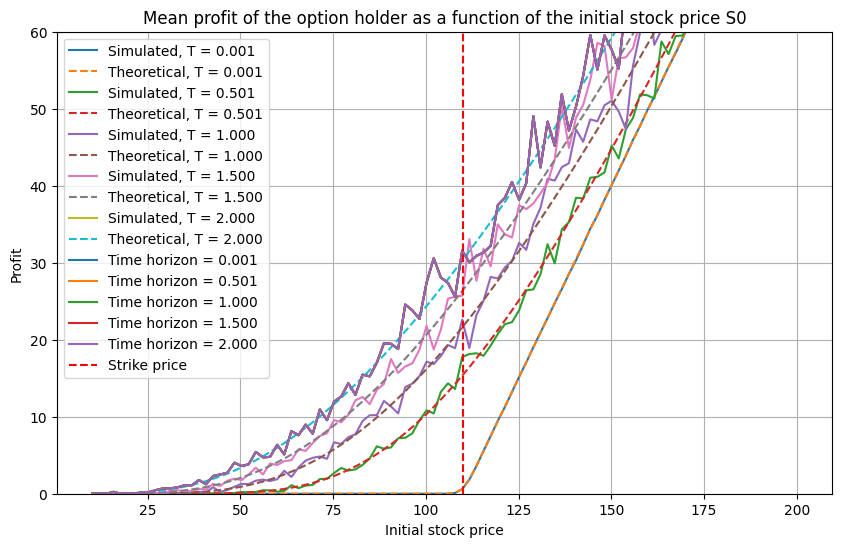

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import norm  

def black_scholes_call_price(S0, K, T, sigma):  
    d1 = (np.log(S0 / K) + 0.5 * sigma ** 2 * T) / (sigma * np.sqrt(T))  
    d2 = d1 - sigma * np.sqrt(T)  
    return S0 * norm.cdf(d1) - K * norm.cdf(d2)  


def geometric_brownian_motion(T, mu, sigma, S0, steps):
    """
    Simulate a Geometric Brownian Motion trajectory.
    """
    dt = T / steps
    t = np.linspace(0, T, steps)
    W = np.random.standard_normal(size=steps)
    W = np.cumsum(W) * np.sqrt(dt)  # standard brownian motion
    X = (mu - 0.5 * sigma ** 2) * t + sigma * W
    S = S0 * np.exp(X)  # geometric brownian motion
    return S

# Simulation parameters
T_max = 2.0  # time horizon
mu = 0.0  # drift
sigma = 0.5  # volatility
K = 110  # strike price
steps = 500  # number of steps
simulations = 1000  # number of simulations

plt.figure(figsize=(10, 6))

for T in np.linspace(0.001, T_max, 5):  
    mean_profit = []  
    theoretical_prices = []   
    for S0 in tqdm(np.linspace(10, 200, 100)):
        # Simulate GBM and calculate profits
        profits = []
        for i in range(simulations):
            gbm = geometric_brownian_motion(T, mu, sigma, S0, steps)
            profit = max(gbm[-1] - K, 0)  # profit at maturity
            profits.append(profit)
        mean_profit.append(np.mean(profits))  
  
        theoretical_price = black_scholes_call_price(S0, K, T, sigma)  
        theoretical_prices.append(theoretical_price)  
  
    plt.plot(np.linspace(10, 200, 100), mean_profit, label=f'Simulated, T = {T:.3f}')  
    plt.plot(np.linspace(10, 200, 100), theoretical_prices, label=f'Theoretical, T = {T:.3f}', linestyle='--')  

for T in np.linspace(0.001, T_max, 5):


    plt.plot(np.linspace(10, 200, 100), mean_profit, label=f'Time horizon = {T:.3f}')

plt.title("Mean profit of the option holder as a function of the initial stock price S0")
plt.axvline(K, color='red', linestyle='--', label='Strike price')
plt.ylim(0, 60)
plt.legend()
plt.xlabel("Initial stock price")
plt.ylabel("Profit")
plt.grid()
plt.show()


# Portfolio management

Delta hedging is a popular strategy used by portfolio managers to reduce the risk associated with the price movements of an underlying asset. The main idea behind delta hedging is to make the portfolio delta-neutral. The delta of a portfolio is defined as the rate of change of the portfolio value with respect to the price of the underlying asset. In mathematical terms, if $V$ represents the portfolio value and $S$ represents the price of the underlying asset, then the delta ($\Delta$) of the portfolio is given by $$\Delta = \frac{\partial V}{\partial S}.$$

Now, to keep the portfolio delta-neutral, the manager needs to adjust the portfolio's holdings such that the delta of the portfolio remains zero. This is achieved by taking a position in the underlying asset that is opposite to the delta of the options in the portfolio. If $n$ is the number of options and $\Delta_{opt}$ is the delta of each option, then the number of units ($N$) of the underlying asset that the manager needs to hold is given by $$N = -n \times \Delta_{opt}.$$

# Algorithm: Delta Hedging  
   
1. **Initialize** the portfolio with a certain number of options contracts (n) and note the delta of each option (Δ_option).  
   
2. **Calculate** the overall delta of the portfolio by multiplying the number of options contracts by the delta of each option.  
   
3. **Determine** the number of units of the underlying asset to hold in the portfolio (N) by taking the negative of the portfolio's overall delta. This is given by the formula:   
$$N = -n \times Δ_{option}$$  
   
4. **Rebalance** the portfolio by buying or selling the underlying asset such that the number of units of the underlying asset in the portfolio matches N.  
   
5. **Monitor** the portfolio continuously. Whenever the price of the underlying asset or the options change, recalculate N using the formula in step 3 and rebalance the portfolio accordingly.  
   
6. **Repeat** step 5 until the options in the portfolio expire or are closed.  
   
This algorithm ensures that the portfolio remains delta-neutral, thereby reducing the risk associated with the price movements of the underlying asset.

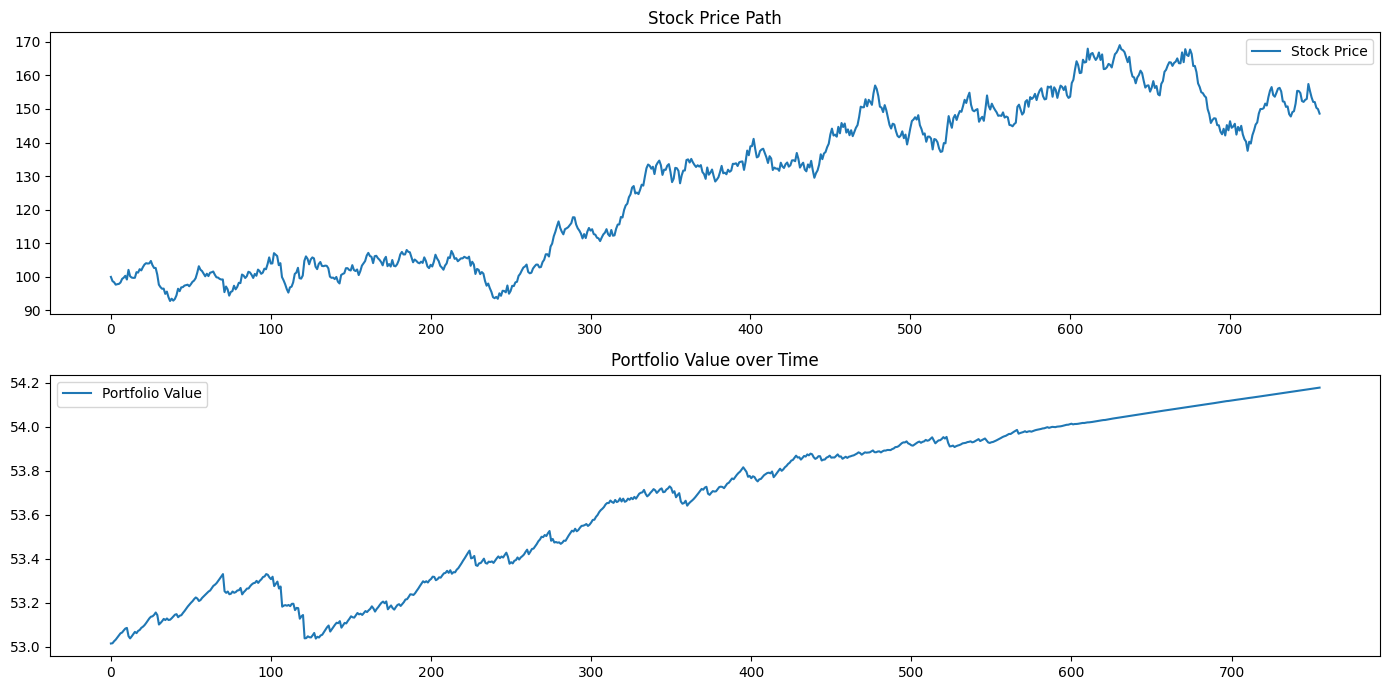

Initial Option Premium:  12.334713967362283
First 10 Portfolio Values:  [53.01581560660397, 53.01685678159109, 53.02619192454022, 53.03323460023567, 53.04312714609537, 53.05311758117658, 53.06213410974162, 53.06567980604962, 53.075126320021944, 53.08350150592279]


In [145]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the stock and the option
initial_stock_price = 100
strike_price = 105
risk_free_rate = 0.005
volatility = 0.2
time_to_expiry = 3  # in years
number_of_steps = 3*252  # daily hedging

# Time step for each simulation
dt = time_to_expiry / number_of_steps

# Simulating stock price paths using Geometric Brownian Motion
def simulate_stock_price(S0, risk_free_rate, sigma, dt, steps):
    random_shocks = np.random.normal(0, np.sqrt(dt), steps)
    price_path = [S0]
    for shock in random_shocks:
        price_path.append(price_path[-1] * np.exp((risk_free_rate - 0.5 * sigma**2) * dt + sigma * shock))
    return price_path

# Black-Scholes Delta of a European Call Option
def black_scholes_delta(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    delta = norm.cdf(d1)
    return delta

# Black-Scholes price of a European Call Option
def black_scholes_call_price(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Adjusted delta hedging simulation with corrected portfolio valuation
def simulate_delta_hedging_corrected(S0, K, T, r, sigma, steps):
    stock_path = simulate_stock_price(S0, r, sigma, dt, steps)
    hedging_positions = [0]  # start with no hedging position
    portfolio_value = []
    option_position = -1  # long 1 call option (negative because we're simulating the seller's perspective)
    option_premium = black_scholes_call_price(S0, K, T, r, sigma)  # premium for selling the option
    cash_position = option_premium  # initial cash position is the premium received for selling the option

    for i in range(steps):
        # Calculate delta
        T_remaining = T - (i * dt)
        delta = black_scholes_delta(stock_path[i], K, T_remaining, r, sigma)
        
        # Adjust the hedging position
        if i > 0:  # no need to hedge at the initial step as the option has just been sold
            position_change = delta - hedging_positions[-1]
            cash_position -= position_change * stock_path[i]
            hedging_positions.append(delta)  # delta position after rebalancing
        else:
            hedging_positions.append(delta)  # initial delta position
        
        # Update cash position with interest accrual
        cash_position *= np.exp(r * dt)
        
        # Update portfolio value
        # Portfolio value is cash + value of stocks in hedging position - value of option position
        portfolio_value.append(cash_position + hedging_positions[-1] * stock_path[i] + option_position * black_scholes_call_price(stock_path[i], K, T_remaining, r, sigma))

    return stock_path, hedging_positions, portfolio_value, option_premium

# Re-run the simulation with the corrected portfolio valuation
stock_path, hedging_positions, portfolio_value, option_premium = simulate_delta_hedging_corrected(
    initial_stock_price, strike_price, time_to_expiry, risk_free_rate, volatility, number_of_steps
)

# Plot the results
plt.figure(figsize=(14, 7))

# Plot for Stock Price Path
plt.subplot(2, 1, 1)
plt.plot(stock_path, label='Stock Price')
plt.title('Stock Price Path')
plt.legend()

# Plot for Portfolio Value over Time
plt.subplot(2, 1, 2)
plt.plot(portfolio_value, label='Portfolio Value')
#plt.axhline(option_premium, color='red', linestyle='--', label='Initial Option Premium')
plt.title('Portfolio Value over Time')
plt.legend()

plt.tight_layout()
plt.show()

# Display the initial option premium and the first few values of the portfolio
print("Initial Option Premium: ", option_premium)
print("First 10 Portfolio Values: ", portfolio_value[:10])


# Volatility of a real stocks

[*********************100%%**********************]  1 of 1 completed


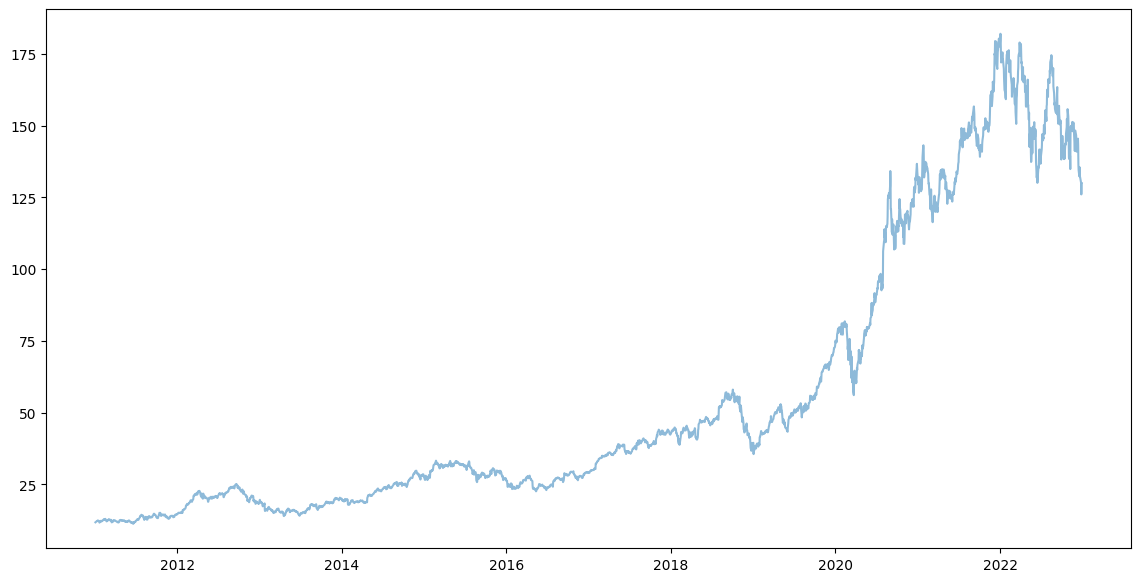

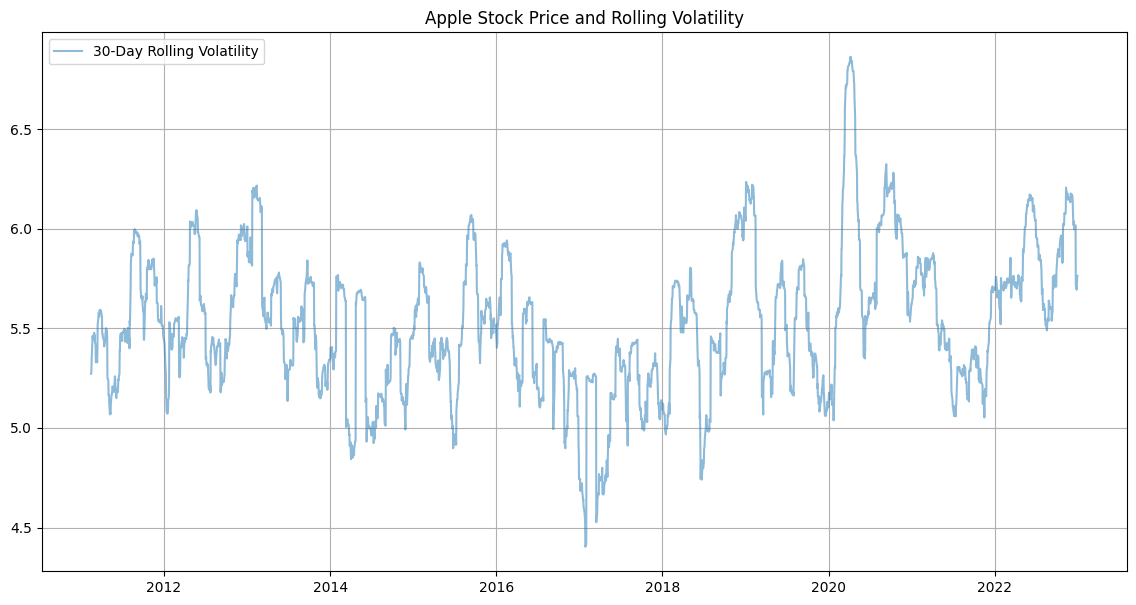

In [147]:
import yfinance as yf  
import numpy as np  
import matplotlib.pyplot as plt  
  
# Download historical data for Apple  
apple_data = yf.download('AAPL', start='2011-01-01', end='2022-12-31')  
  
# Calculate daily returns  
apple_data['Return'] = apple_data['Close'].pct_change()  
  
# Calculate rolling 30-day volatility  
apple_data['Rolling Volatility'] = apple_data['Return'].rolling(window=30).std() * np.sqrt(252)  # 252 trading days in a year  
  
# Plot closing prices  
plt.figure(figsize=(14, 7))  
plt.plot(apple_data['Close'], label='Apple', alpha=0.5)  
  
# Plot rolling volatility  
plt.figure(figsize=(14, 7))  
plt.plot(np.log(1+1000*apple_data['Rolling Volatility']), label='30-Day Rolling Volatility', alpha=0.5)  
  
plt.legend(loc='upper left')  
plt.title('Apple Stock Price and Rolling Volatility')  
plt.grid(True)  
plt.show()  


# Stochastic volatility models: Heston model

The Heston model is a mathematical model that describes the evolution of the volatility of an asset. It was proposed by Steven Heston in 1993. The model assumes that the volatility of the asset is not constant, but varies over time following a mean-reverting stochastic process.  
  
The Heston model is defined by the following system of stochastic differential equations:  
  
$$  
dS_t = \mu S_t dt + \sqrt{\nu_t} S_t dW_t^1  
$$  
  
$$  
d\nu_t = \kappa (\theta - \nu_t) dt + \xi \sqrt{\nu_t} dW_t^2  
$$  
  
where:  
  
- $S_t$ is the asset price at time $t$,  
- $\nu_t$ is the variance of the asset price at time $t$,  
- $\mu$ is the expected return of the asset,  
- $\kappa$ is the rate at which the variance reverts to the mean,  
- $\theta$ is the long-term average variance,  
- $\xi$ is the volatility of volatility, i.e., the standard deviation of the variance,  
- $W_t^1$ and $W_t^2$ are two Wiener processes (standard Brownian motions) with correlation $\rho$.  
  
The Heston model is widely used in finance for derivative pricing, as it can capture the volatility smile effect observed in the market.  

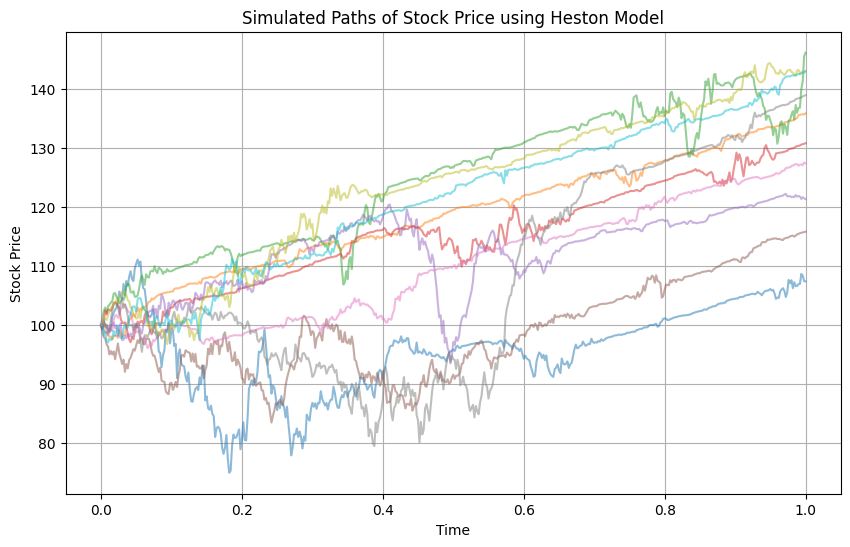

In [150]:
import numpy as np  
  
def heston_model(T, mu, kappa, theta, xi, rho, S0, v0, steps, paths):  
    dt = T / steps  
    S = np.zeros((steps+1, paths))  
    v = np.zeros((steps+1, paths))  
    S[0] = S0  
    v[0] = v0  
    dW1 = np.sqrt(dt) * np.random.normal(size=(steps, paths))  
    dW2 = rho * dW1 + np.sqrt(1 - rho**2) * np.sqrt(dt) * np.random.normal(size=(steps, paths))  
    for t in range(1, steps+1):  
        S[t] = S[t-1] + mu * S[t-1] * dt + np.sqrt(v[t-1]) * S[t-1] * dW1[t-1]  
        v[t] = np.maximum(v[t-1] + kappa * (theta - v[t-1]) * dt + xi * np.sqrt(v[t-1]) * dW2[t-1], 0)  
    return S  
  
# Heston model parameters  
mu = 0.25  # risk-free rate  
kappa = 1.0  # mean reversion speed  
theta = 0.04  # long-term volatility  
xi = 0.9  # volatility of volatility  
rho = -0.5  # correlation between the two processes  
S0 = 100  # initial stock price  
v0 = 0.04  # initial volatility  
steps = 500  # number of steps  
paths = 10000  # number of paths  
  
# Simulate the Heston model  
S = heston_model(T, mu, kappa, theta, xi, rho, S0, v0, steps, paths)  
  
# Calculate the option price  
option_price = np.maximum(S[-1] - K, 0).mean()  
 

import matplotlib.pyplot as plt  
  
# Plot the first 10 paths  
plt.figure(figsize=(10, 6))  
for i in range(10):  
    plt.plot(np.linspace(0, T, steps+1), S[:, i], alpha=0.5)  
  
plt.title('Simulated Paths of Stock Price using Heston Model')  
plt.xlabel('Time')  
plt.ylabel('Stock Price')  
plt.grid(True)  
plt.show()  


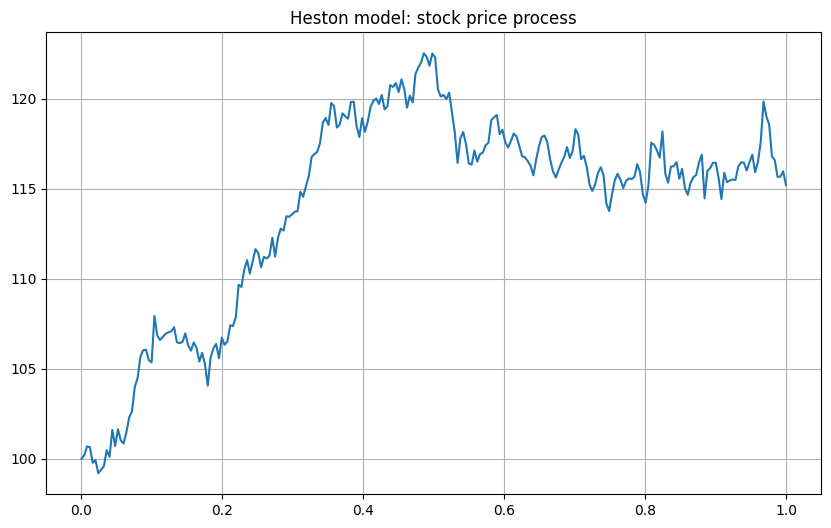

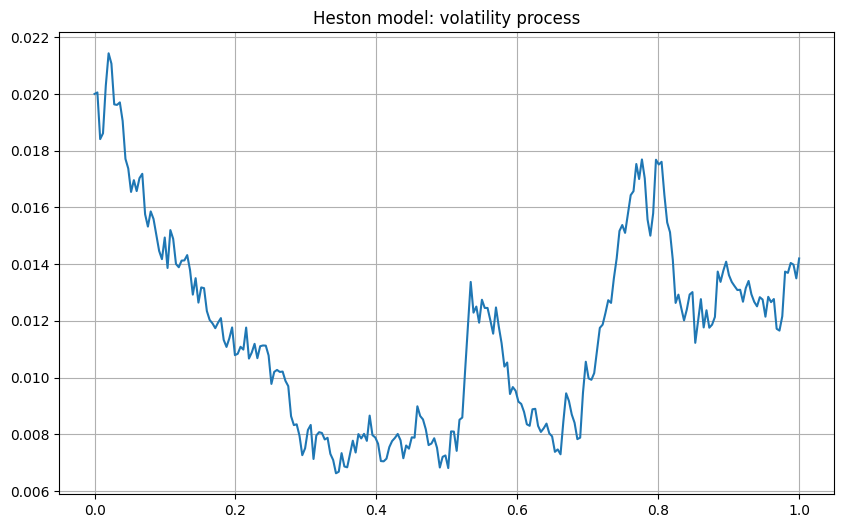

In [127]:
import numpy as np  
import matplotlib.pyplot as plt  
from scipy.integrate import quad  
from scipy.stats import norm  
  
# Heston model parameters  
kappa = 1.0  
theta = 0.02  
sigma = 0.1  
rho = -0.5  
v0 = 0.02  
  
# Time grid  
T = 1.0  
N = 252  
dt = T/N  
t = np.linspace(0, T, N)  
  
# Stock price and volatility processes initialization  
S = np.zeros(N)  
v = np.zeros(N)  
S[0] = 100  
v[0] = v0  
  
# Monte Carlo simulation  
#np.random.seed(0)  
for i in range(1, N):  
    dW1 = np.random.normal(0, np.sqrt(dt))  
    dW2 = rho*dW1 + np.sqrt(1-rho**2)*np.random.normal(0, np.sqrt(dt))  
    v[i] = v[i-1] + kappa*(theta-max(v[i-1],0))*dt + sigma*np.sqrt(max(v[i-1],0))*dW2  
    S[i] = S[i-1] + np.sqrt(max(v[i-1],0))*S[i-1]*dW1  
  
# Plot stock price process  
plt.figure(figsize=(10,6))  
plt.plot(t, S)  
plt.title('Heston model: stock price process')  
plt.grid()
plt.show()  
  
# Plot volatility process  
plt.figure(figsize=(10,6))  
plt.plot(t, v)  
plt.title('Heston model: volatility process') 
plt.grid()
plt.show()  


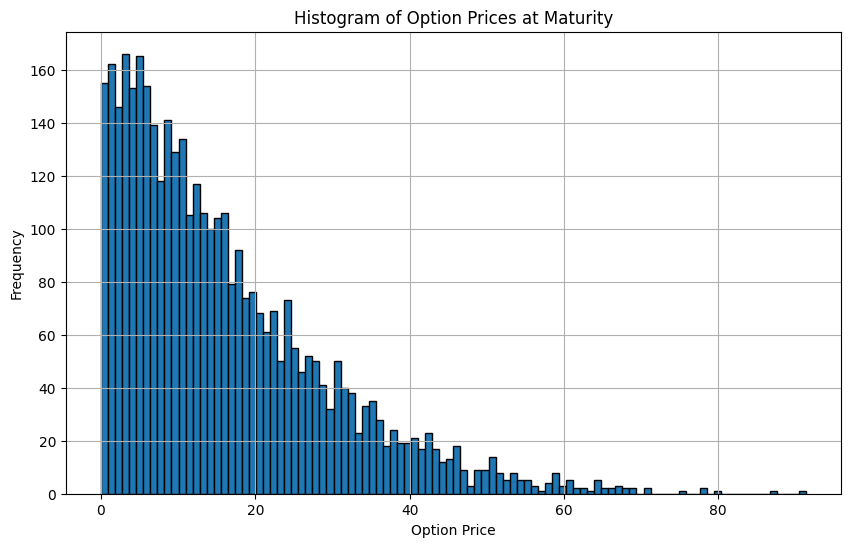

In [119]:
# Compute option prices at maturity for all paths  
option_prices = np.maximum(S[-1] - K, 0)  

# Plot histogram  
plt.figure(figsize=(10, 6))  
plt.hist(option_prices[option_prices!=0], bins=100, edgecolor='black')  
plt.title('Histogram of Option Prices at Maturity')  
plt.xlabel('Option Price')  
plt.ylabel('Frequency')  
plt.grid(True)  
plt.show()  


## Implied volatility
Implied volatility is a measure of the expected volatility of a security's price. In simple terms, implied volatility is the estimated volatility of a security's price. In options trading, implied volatility shows how much the marketplace believes an asset's price will change for a given set of inputs.   
  
Implied volatility does not predict the direction in which the price change will proceed. For example, high volatility means a large price swing, but the price could swing upward just as quickly as it could swing downward.  
  
The implied volatility ($\sigma_{imp}$) is usually calculated by solving the Black-Scholes formula for $\sigma$. Here is the Black-Scholes formula for a call option:  
  
$$  
C = S_0 \cdot N(d_1) - X \cdot e^{-rT} \cdot N(d_2)  
$$  
  
where  
  
$$  
d_1 = \frac{ln(\frac{S_0}{X}) + (r + \frac{\sigma^2}{2})T}{\sigma \sqrt{T}}  
$$  
  
and  
  
$$  
d_2 = d_1 - \sigma \sqrt{T}  
$$  
  
$S_0$ is the current price of the underlying asset, $X$ is the strike price of the option, $r$ is the risk-free interest rate, $T$ is the time to expiration of the option, $\sigma$ is the volatility of the underlying asset, $N(\cdot)$ is the cumulative distribution function of the standard normal distribution.  
  
The implied volatility is the value of $\sigma$ that makes the Black-Scholes formula equal to the market price of the option.


# Volatility Smile

The smile emerges when the implied volatilities of options are higher for deeply out-of-the-money or deeply in-the-money options, compared to at-the-money options. This phenomenon often occurs due to market uncertainties or significant market events, and it challenges the constant volatility assumption in the Black-Scholes model, a well-known mathematical model for pricing options.

In [120]:
from IPython.display import Image
Image(url= "Volatility-Smile.webp")

In [130]:
import yfinance as yf  

# Get data for Apple stock  
apple = yf.Ticker("AAPL")  
  
# Get options data  
# Please note you will need a source for options data here  
opt = apple.option_chain(apple.options[0])  

In [131]:
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL231117C00050000,2023-11-16 18:48:49+00:00,50.0,139.00,0.0,0.00,0.0,0.0,1.0,30.0,0.000010,True,REGULAR,USD
1,AAPL231117C00055000,2023-11-15 14:43:07+00:00,55.0,133.05,0.0,0.00,0.0,0.0,2.0,2.0,0.000010,True,REGULAR,USD
2,AAPL231117C00060000,2023-11-16 20:47:32+00:00,60.0,129.80,0.0,0.00,0.0,0.0,2.0,10.0,0.000010,True,REGULAR,USD
3,AAPL231117C00065000,2023-11-15 19:34:10+00:00,65.0,123.71,0.0,0.00,0.0,0.0,2.0,0.0,0.000010,True,REGULAR,USD
4,AAPL231117C00070000,2023-11-09 20:17:29+00:00,70.0,111.95,0.0,0.00,0.0,0.0,244.0,0.0,0.000010,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,AAPL231117C00275000,2023-10-03 17:24:36+00:00,275.0,0.01,0.0,0.01,0.0,0.0,1.0,1289.0,2.187505,False,REGULAR,USD
69,AAPL231117C00280000,2023-09-28 15:04:17+00:00,280.0,0.01,0.0,0.01,0.0,0.0,14.0,559.0,2.312504,False,REGULAR,USD
70,AAPL231117C00285000,2023-11-16 15:36:04+00:00,285.0,0.01,0.0,0.00,0.0,0.0,1.0,307.0,0.500005,False,REGULAR,USD
71,AAPL231117C00290000,2023-11-15 18:10:09+00:00,290.0,0.01,0.0,0.00,0.0,0.0,1.0,2635.0,1.000005,False,REGULAR,USD
